In [1]:
gene_location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics"

species_list = ["1.Lasiomatta_megera","2.Pieris_napi","3.Pararge_aegeria"]

gene_list = []

for species in species_list:
    with open(f"{gene_location}/{species}/4.Intersections_test/intersection_set.txt", 'r') as intersection_list:
        for gene_line in intersection_list:
            gene_name = gene_line.strip().split(",")[0]
            if gene_name not in gene_list:
                gene_list.append(gene_name)
    print(len(gene_list))

94
131
181


In [2]:
for gene_name in gene_list:
    print(gene_name)

2453at7088
13413at7088
15035at7088
14245at7088
1846at7088
652at7088
2599at7088
5650at7088
821at7088
386at7088
3127at7088
1709at7088
6156at7088
3667at7088
9535at7088
2906at7088
8465at7088
12090at7088
12180at7088
274at7088
12326at7088
11858at7088
11288at7088
2938at7088
5679at7088
8306at7088
2939at7088
5486at7088
12212at7088
2813at7088
11619at7088
7044at7088
4799at7088
2003at7088
6173at7088
4078at7088
1076at7088
cycle
1319at7088
11115at7088
8048at7088
7508at7088
4089at7088
68at7088
7935at7088
2019at7088
14213at7088
559at7088
10142at7088
10139at7088
2160at7088
5567at7088
2335at7088
3537at7088
2234at7088
7053at7088
8793at7088
4176at7088
8595at7088
2694at7088
4625at7088
12075at7088
5858at7088
2166at7088
1246at7088
993at7088
7919at7088
5563at7088
5035at7088
2428at7088
515at7088
2021at7088
10662at7088
9339at7088
2273at7088
7415at7088
1993at7088
3611at7088
543at7088
11428at7088
2931at7088
7476at7088
5427at7088
1918at7088
11189at7088
3833at7088
2829at7088
12640at7088
1130at7088
11835at7088
8711a

In [6]:
gene_name_dict = {}
with open("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/12.Rho_networks/2.Diapausing/Filtered_set_core_set.csv", 'r') as set_file:
    for lines in set_file.readlines()[1:]:
        lines_split = lines.strip().split(",")
        if lines_split[3] not in gene_name_dict:
            gene_name_dict[lines_split[3]] = lines_split[0]
        if lines_split[4] not in gene_name_dict:
            gene_name_dict[lines_split[4]] = lines_split[1]
        # assert False
print(len(gene_name_dict))

504


In [11]:
gene_cluster_dict = {}
cluster_list = []
with open("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/gene_clusters_kmeans.csv", 'r') as clust_file:
    for lines in clust_file.readlines()[1:]:
        lines_split = lines.strip().split(",")
        gene_cluster_dict[gene_name_dict[lines_split[0]]] = lines_split[-1]
        # print(gene_cluster_dict)
        if lines_split[-1] not in cluster_list:
            cluster_list.append(lines_split[-1])
        # assert False

In [15]:
cluster_list_dictionary = {}
for clust_name in cluster_list:
    cluster_list_dictionary[clust_name] = [0,0,0]
print(cluster_list_dictionary)

{'9': [0, 0, 0], '5': [0, 0, 0], '6': [0, 0, 0], '10': [0, 0, 0], '1': [0, 0, 0], '11': [0, 0, 0], '3': [0, 0, 0], '7': [0, 0, 0], '4': [0, 0, 0], '2': [0, 0, 0], '8': [0, 0, 0]}


In [16]:
for i,species in enumerate(species_list):
    with open(f"{gene_location}/{species}/4.Intersections_test/intersection_set.txt", 'r') as intersection_list:
        for gene_line in intersection_list:
            gene_name = gene_line.strip().split(",")[0]
            
            cluster_list_dictionary[gene_cluster_dict[gene_name]][i] += 1
print(cluster_list_dictionary)


{'9': [8, 3, 8], '5': [8, 8, 11], '6': [12, 5, 7], '10': [9, 3, 7], '1': [7, 8, 13], '11': [4, 0, 5], '3': [5, 1, 5], '7': [9, 5, 8], '4': [14, 8, 10], '2': [13, 4, 6], '8': [5, 5, 4]}


In [21]:
output = "Cluster,Lasiomatta_megera,Pieris_napi,Pararge_aegeria"

for key,value in cluster_list_dictionary.items():
    count = ''
    for numver in value:
        count += str(numver)+","
        
    # count = ",".join(value)
    output += f"\n{key},{count[:-1]}"
print(output)
with open("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/18.Cluster_in_each_species/counts_per_clusrer.csv", 'w') as out_file:
    out_file.write(output)

Cluster,Lasiomatta_megera,Pieris_napi,Pararge_aegeria
9,8,3,8
5,8,8,11
6,12,5,7
10,9,3,7
1,7,8,13
11,4,0,5
3,5,1,5
7,9,5,8
4,14,8,10
2,13,4,6
8,5,5,4


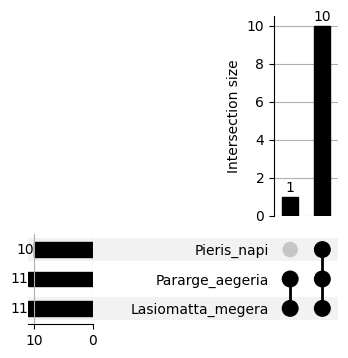

In [22]:
import pandas as pd
from upsetplot import from_indicators, UpSet
import matplotlib.pyplot as plt

# Step 1: Load your data
df = pd.read_csv("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/18.Cluster_in_each_species/counts_per_clusrer.csv")  # Replace with your actual file path

# Step 2: Set the 'Gene' column as index (optional but recommended)
df.set_index("Cluster", inplace=True)

df = df.astype(bool)


# Step 3: Convert to UpSet-compatible format
upset_data = from_indicators(data=df, indicators=df.columns.tolist())

# Step 4: Create and show the plot
upset = UpSet(upset_data, show_counts=True)
upset.plot()
plt.savefig('/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/18.Cluster_in_each_species/counts_per_clusrer_upset_output.pdf', format='pdf', bbox_inches='tight')

plt.show()